**Bienvenue dans ce notebook Jupyter associé à l'application du Hierarchical Clustering en python avec les bibiothèques Scipy et Scikit-Learn (application de mon cours d'apprentissage spécialité IA)**

In [1]:
import pandas as pd
import numpy as np 
import scipy

In [2]:
df = pd.read_csv('./Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Le but, ici, serait d'appliquer le hierarchical clustering dans le but d'obtenir un dendogram permettant d'identifier des groupes de clients ayant des comportements d'achats similaires afin de personnaliser les offres marketing.

In [5]:
df = df.drop('CustomerID', axis =1)

In [6]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
df = df.drop('Genre', axis = 1)

In [9]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


On commence par standardiser nos trois colonnes

In [17]:
def moyenne(X):
    s = 0
    for i in range(0,len(X)):
        s+= X[i]
    return s / len(X)

In [18]:
def ecart_type(X):
    s = 0
    for i in range(0, len(X)):
        s+= (X[i] - moyenne(X))**2
    return s / len(X)

In [19]:
liste_ages = df['Age'].tolist()
liste_revenus = df['Annual Income (k$)'].tolist()
liste_scores = df['Spending Score (1-100)'].tolist()

In [22]:
def standard_scale(ma_liste):
    m = moyenne(ma_liste)
    ect = ecart_type(ma_liste)
    
    liste_propre = []
    
    for x in ma_liste:
        nouveau_x = (x - m) / ect
        liste_propre.append(nouveau_x)
        
    return liste_propre

In [24]:
liste_ages = standard_scale(liste_ages)
liste_revenus = standard_scale(liste_revenus)
liste_scores = standard_scale(liste_scores)

**On passe ensuite au calcul de la matrice de distances**

In [52]:
n = len(df)
distances_matrix = np.zeros((399, 399))

In [53]:
def distance_euclidienne(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2 + (x1[2] - x2[2])**2)

In [54]:
colonnes_utiles = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(n):
    for j in range(i + 1, n): 
        dist = distance_euclidienne(df.iloc[i][colonnes_utiles].tolist(), df.iloc[j][colonnes_utiles].tolist())
        
        distances_matrix[i][j] = dist
        distances_matrix[j][i] = dist

In [55]:
distances_matrix

array([[ 0.        , 42.04759208, 33.03028913, ...,  0.        ,
         0.        ,  0.        ],
       [42.04759208,  0.        , 75.01333215, ...,  0.        ,
         0.        ,  0.        ],
       [33.03028913, 75.01333215,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(399, 399))

In [57]:
distances_matrix[distances_matrix == 0] = np.inf

In [58]:
distances_matrix

array([[        inf, 42.04759208, 33.03028913, ...,         inf,
                inf,         inf],
       [42.04759208,         inf, 75.01333215, ...,         inf,
                inf,         inf],
       [33.03028913, 75.01333215,         inf, ...,         inf,
                inf,         inf],
       ...,
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf],
       [        inf,         inf,         inf, ...,         inf,
                inf,         inf]], shape=(399, 399))

In [50]:
nombre_fusions = n-1

In [60]:
tailles_clusters = {i: 1 for i in range(n)}
journal_de_bord = []

In [61]:
for i in range(nombre_fusions):
    

    position = np.unravel_index(np.argmin(distances_matrix), distances_matrix.shape)
    id_a = position[0]
    id_b = position[1]
    
    distance_min = distances_matrix[id_a][id_b]

    taille_a = tailles_clusters[id_a]
    taille_b = tailles_clusters[id_b]
    nouvelle_taille = taille_a + taille_b

    nv_id = n + i
    tailles_clusters[nv_id] = nouvelle_taille


    journal_de_bord.append([id_a, id_b, distance_min, nouvelle_taille])

    for k in range(nv_id): 

        if k != id_a and k != id_b:
            
            nouvelle_dist = min(distances_matrix[id_a][k], distances_matrix[id_b][k])
            
            distances_matrix[nv_id][k] = nouvelle_dist
            distances_matrix[k][nv_id] = nouvelle_dist


    distances_matrix[id_a, :] = np.inf
    distances_matrix[:, id_a] = np.inf
    
    distances_matrix[id_b, :] = np.inf
    distances_matrix[:, id_b] = np.inf

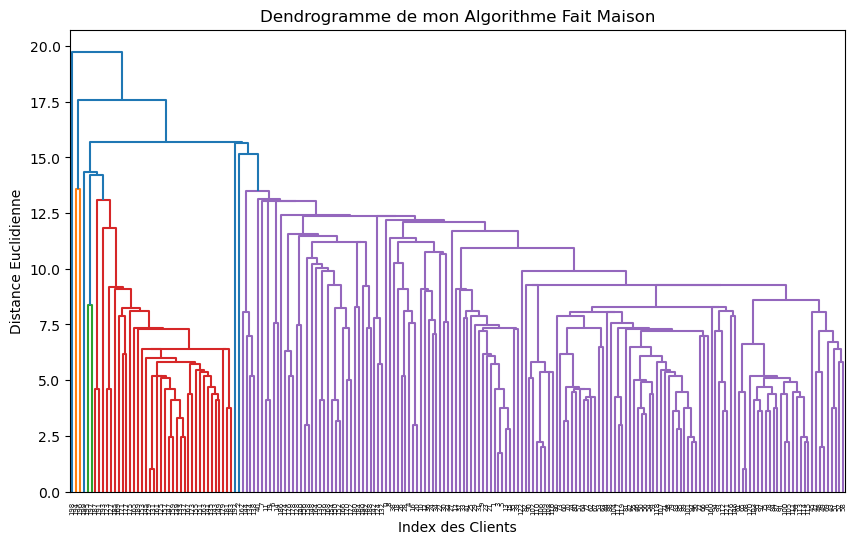

In [70]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# BAM ! Tu lui donnes direct ton journal, pas besoin de traducteur !
dendrogram(journal_de_bord) 

plt.title("Dendrogramme de mon Algorithme Fait Maison")
plt.xlabel("Index des Clients")
plt.ylabel("Distance Euclidienne")
plt.show()

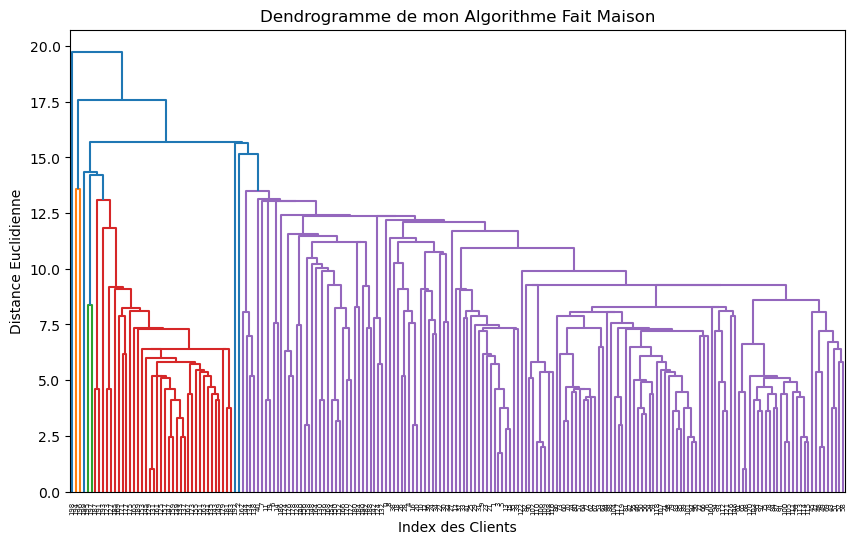

In [63]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

dendrogram(journal_de_bord) 

plt.title("Dendrogramme de mon Algorithme Fait Maison")
plt.xlabel("Index des Clients")
plt.ylabel("Distance Euclidienne")
plt.show()

**Voici la fin de notre algorithme de hierarchical clustering !!!**

In [67]:
from scipy.cluster.hierarchy import fcluster


labels = fcluster(journal_de_bord, t=5, criterion='maxclust')

df['Cluster_ID'] = labels

print(df.head())

   Age  Annual Income (k$)  Spending Score (1-100)  Cluster_ID
0   19                  15                      39           3
1   21                  15                      81           3
2   20                  16                       6           3
3   23                  16                      77           3
4   31                  17                      40           3


In [68]:
print(df.groupby('Cluster_ID').mean())

                  Age  Annual Income (k$)  Spending Score (1-100)
Cluster_ID                                                       
1           46.000000          123.000000               22.000000
2           32.692308           86.538462               82.128205
3           40.369427           52.490446               43.101911
4           33.000000          113.000000                8.000000
5           32.000000          137.000000               18.000000


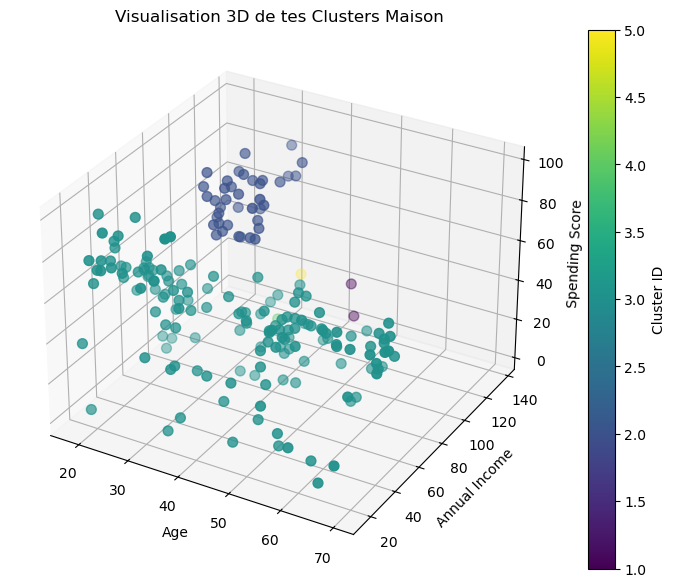

In [69]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                     c=df['Cluster_ID'], cmap='viridis', s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.colorbar(scatter, label='Cluster ID')
plt.title("Visualisation 3D de tes Clusters Maison")
plt.show()